# Simple limit plotting script

To run this you need to have the output from a [previous tutorial](https://github.com/XENON1T/Xephyr/blob/master/notebooks/ToyFitter.ipynb) or just redirect the input files to your Xephyr generated limits

In [1]:
// Loading some inputs 

TString xeDir(gSystem->Getenv("XEPHYR_DIR"));   // Xephyr work Directory 

TFile *f_bands = TFile::Open(xeDir + "/sensitivity.root");                 // sensitivity file
// TFile *f_obs_limit = TFile::Open(xeDir + "/limits_test_mu0_V0_Gen1.root"); // observed limit file, we don't have it ;)


In [2]:
// retrieving the graphs 

TGraphAsymmErrors *Exp_limitsS1 = (TGraphAsymmErrors*) f_bands->Get("sensitivity_xsec_1s");
TGraphAsymmErrors *Exp_limitsS2 = (TGraphAsymmErrors*) f_bands->Get("sensitivity_xsec_2s");
TGraphAsymmErrors* Exp_limits = (TGraphAsymmErrors*)Exp_limitsS1->Clone("expectedMedian2");

In [3]:
// Plotting Style

TCanvas *c1 = new TCanvas("limits", "limit", 600, 600);

Exp_limitsS1->SetFillColor(3);
Exp_limitsS1->SetLineColor(3);
Exp_limitsS1->SetMarkerColor(3);
Exp_limitsS1->SetLineWidth(15);
Exp_limitsS1->SetMarkerSize(0);

Exp_limitsS2->SetFillColor(5);
Exp_limitsS2->SetLineColor(5);
Exp_limitsS2->SetLineWidth(15);
Exp_limitsS2->SetMarkerColor(5);
Exp_limitsS2->SetMarkerSize(0);

Exp_limits->SetFillColor(0);
Exp_limits->SetMarkerStyle(7);
Exp_limits->SetMarkerSize(1);
Exp_limits->SetLineStyle(4);
Exp_limits->SetLineWidth(3);


In [4]:
// Set axis titles and other

Exp_limitsS2->SetTitle("");
Exp_limitsS2->GetYaxis()->SetTitle("#sigma [cm^{2}]");

Exp_limitsS2->GetXaxis()->SetTitle("M  [GeV]");


Exp_limitsS2->GetXaxis()->SetLimits(5.,20000.);
Exp_limitsS2->GetYaxis()->SetRangeUser(1E-48,1E-43);

Exp_limits->GetXaxis()->SetLimits(5.,20000.);
//Exp_limits->GetYaxis()->SetRangeUser(1.,1E+15);
Exp_limits->GetYaxis()->SetRangeUser(1E-48,1E-43);

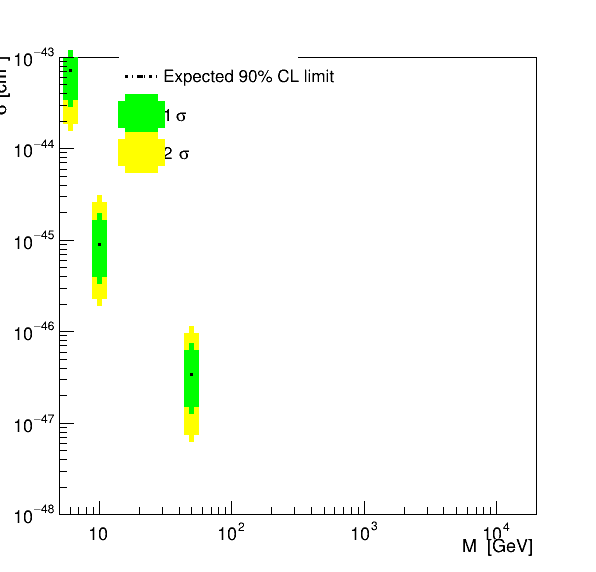

In [5]:
// Drawing + legend


Exp_limitsS2->Draw("AP");
Exp_limitsS1->Draw("sameP");
Exp_limits->Draw("samePX");


TLegend* lego = new TLegend(0.2,0.9,0.5,0.7);
  lego->SetTextSize(0.033);
  lego->SetFillColor(0);
  lego->SetBorderSize(0);
  lego->AddEntry(Exp_limits, "Expected 90\% CL limit");
  lego->AddEntry(Exp_limitsS1,"1 #sigma","f");
  lego->AddEntry(Exp_limitsS2,"2 #sigma","f");
  lego->Draw();


gPad->SetLogy();
gPad->SetLogx();
gPad->RedrawAxis("g");

c1->Draw();